| <div align="left"> <a href="https://github.com/marashot96/Credit-Products-Analysis/blob/main/notebooks/Navigator.md">🔙 Назад к Jupyter-notebooks </a>  </div> | | <div align="center">  <a href="https://github.com/marashot96/portfolio/blob/main/README.md#-реализованные-проекты">🔙 Мое полное портфолио </a> </div> | | <div align="right"> <a href="https://github.com/marashot96/Credit-Products-Analysis?tab=readme-ov-file#-czech-bank-project--">🔙 Назад к описанию проекта </a>  </div> |
| ---- | -------- | ----- | ---------------- | ------ |

# <div align="center"> A/B Тест: Влияние суммы кредита на вероятность дефолта </div>

В этом ноутбуке мы проведем A/B тест, чтобы проверить, влияет ли сумма кредита на вероятность его невозврата (дефолта).


In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

# Загрузка данных о кредитах
loans = pd.read_csv('LOAN.csv', sep=';')

# Фильтрация только завершённых кредитов
loans = loans[loans['status'].isin(['A', 'B', 'C', 'D'])]  # A - ok, B/C/D - дефолт


## Формирование групп для A/B теста


In [2]:
# Медианная сумма кредита
threshold = loans['amount'].median()

# Группировка клиентов по сумме кредита
loans['group'] = np.where(loans['amount'] <= threshold, 'A', 'B')

# Метка дефолта: 1 — дефолт, 0 — выплачен
loans['is_default'] = loans['status'].isin(['B', 'C', 'D']).astype(int)

## Сводная таблица для критерия хи-квадрат


In [3]:
# Контингентная таблица
contingency = pd.crosstab(loans['group'], loans['is_default'])
contingency.columns = ['Погашен', 'Дефолт']
contingency


,Погашен,Дефолт
group,,
A,153,188
B,50,291


## Проведение хи-квадрат теста независимости


In [4]:
# Хи-квадрат тест
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi² = {chi2:.2f}")
print(f"p-value = {p:.4f}")

if p < 0.05:
    print("Вывод: статистически значимое различие между группами есть (отвергаем H0).")
else:
    print("Вывод: статистически значимого различия не обнаружено (не отвергаем H0).")


Chi² = 72.97
p-value = 0.0000
Вывод: статистически значимое различие между группами есть (отвергаем H0).


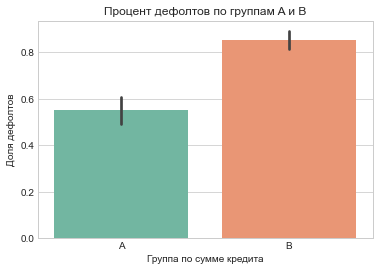

In [7]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=loans,
    x='group', y='is_default',
    estimator=np.mean, ci=95, palette='Set2'
)
plt.title('Процент дефолтов по группам A и B')
plt.ylabel('Доля дефолтов')
plt.xlabel('Группа по сумме кредита')
plt.show()


## Заключение

Мы сравнили вероятность дефолта для клиентов с меньшими и большими суммами кредита, и получили, что различие между группами статистически значимо.  
Этот анализ может использоваться для корректировки кредитной политики и оценки рисков.

---

## 💼 Контактная информация
Если вы хотите обсудить различные задачи, запросы или проекты, предложить кейс или сотрудничество — обязательно напишите мне!

- 📫 [t.me/marashot96](https://t.me/marashot96)
- 🌐 [marashot96@ya.ru](mailto:marashot96@ya.ru)

| <div align="left"> <a href="https://github.com/marashot96/Credit-Products-Analysis/blob/main/notebooks/Navigator.md">🔙 Назад к Jupyter-notebooks </a>  </div> | | <div align="center">  <a href="https://github.com/marashot96/portfolio/blob/main/README.md#-реализованные-проекты">🔙 Мое полное портфолио </a> </div> | | <div align="right"> <a href="https://github.com/marashot96/Credit-Products-Analysis?tab=readme-ov-file#-czech-bank-project--">🔙 Назад к описанию проекта </a>  </div> |
| ---- | -------- | ----- | ---------------- | ------ |